In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50

# from keras.application.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image  import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import splitfolders

In [5]:
IMAGE_SIZE = [224, 224]
data = tf.keras.utils.image_dataset_from_directory('./Segmented Medicinal Leaf Images/')

Found 1835 files belonging to 30 classes.


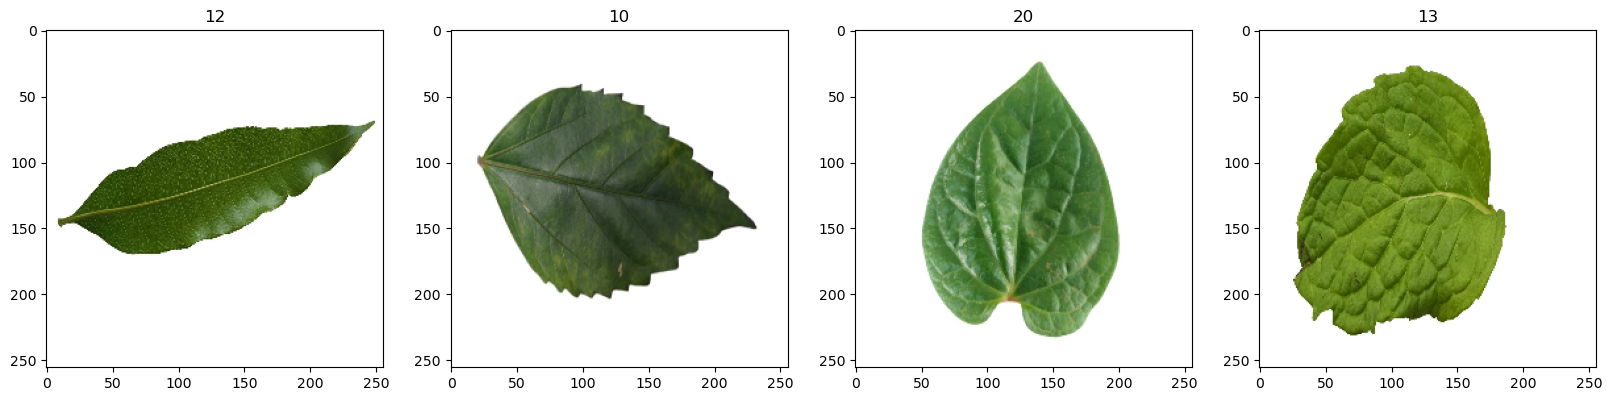

In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [8]:
train_size = int( len(data) * 0.7 )

val_size = int(len( data) * 0.2 ) 

test_size = int(len( data) * 0.1)

In [9]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [10]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



94765736/94765736 [==============================] - 8s 0us/step


In [11]:
for layer in resnet.layers:
    layer.trainable = False

In [12]:
splitfolders.ratio("./Segmented Medicinal Leaf Images/",
                   output="./Dataset", seed=1337, ratio=(.8,.1,.1), group_prefix=None)

Copying files: 1835 files [00:02, 622.03 files/s]


In [13]:
train_path="./Dataset/train"
test_path = './Dataset/test'

In [14]:
folders = glob('./Dataset/train/*')

In [15]:
x = Flatten()(resnet.output)

In [16]:
prediction = Dense(len(folders), activation="softmax")(x)
model = Model(inputs=resnet.input, outputs = prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                                              shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory("Dataset/train",target_size = (224, 224),
                                                                               batch_size = 32,
                                                 class_mode = "categorical")

Found 1455 images belonging to 30 classes.


In [21]:
test_set = test_datagen.flow_from_directory('Dataset/test', target_size=(224,224), batch_size = 32,
                                            class_mode = 'categorical')

Found 209 images belonging to 30 classes.


In [22]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=70,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/70


46/46 [==============================] - 93s 2s/step - loss: 14.2949 - accuracy: 0.1086 - val_loss: 5.4670 - val_accuracy: 0.2297
Epoch 2/70
46/46 [==============================] - 81s 2s/step - loss: 3.4897 - accuracy: 0.3278 - val_loss: 2.4155 - val_accuracy: 0.4593
Epoch 3/70
46/46 [==============================] - 81s 2s/step - loss: 2.5350 - accuracy: 0.4034 - val_loss: 2.4130 - val_accuracy: 0.4833
Epoch 4/70
46/46 [==============================] - 79s 2s/step - loss: 2.5707 - accuracy: 0.4536 - val_loss: 2.5450 - val_accuracy: 0.4880
Epoch 5/70
46/46 [==============================] - 97s 2s/step - loss: 2.2785 - accuracy: 0.4859 - val_loss: 2.9938 - val_accuracy: 0.4880
Epoch 6/70
46/46 [==============================] - 96s 2s/step - loss: 2.0754 - accuracy: 0.5203 - val_loss: 1.7161 - val_accuracy: 0.5742
Epoch 7/70
46/46 [==============================] - 74s 2s/step - loss: 2.0356 - accuracy: 0.5162 - val_loss: 1.8697 - val_accuracy: 0.5742
Epoch 8/70
46/46 

Epoch 56/70
46/46 [==============================] - 118s 3s/step - loss: 1.3495 - accuracy: 0.7326 - val_loss: 2.1373 - val_accuracy: 0.6890
Epoch 57/70
46/46 [==============================] - 125s 3s/step - loss: 1.1459 - accuracy: 0.7636 - val_loss: 2.3584 - val_accuracy: 0.6651
Epoch 58/70
46/46 [==============================] - 130s 3s/step - loss: 0.8328 - accuracy: 0.8021 - val_loss: 2.2006 - val_accuracy: 0.6603
Epoch 59/70
46/46 [==============================] - 79s 2s/step - loss: 1.0570 - accuracy: 0.7711 - val_loss: 1.6235 - val_accuracy: 0.7225
Epoch 60/70
46/46 [==============================] - 78s 2s/step - loss: 1.2809 - accuracy: 0.7464 - val_loss: 1.7091 - val_accuracy: 0.7464
Epoch 61/70
46/46 [==============================] - 78s 2s/step - loss: 1.1037 - accuracy: 0.7904 - val_loss: 2.7712 - val_accuracy: 0.6507
Epoch 62/70
46/46 [==============================] - 80s 2s/step - loss: 1.3461 - accuracy: 0.7519 - val_loss: 2.1723 - val_accuracy: 0.6746
Epoch 63/7

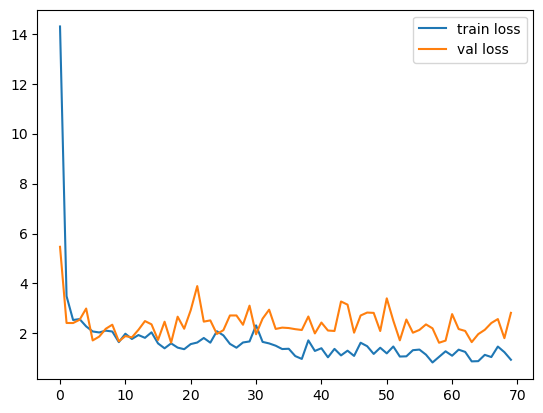

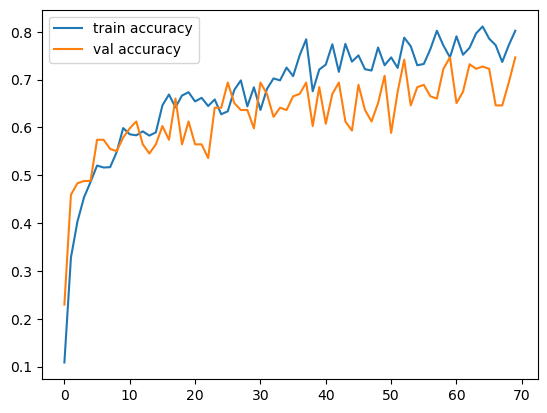

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig("AccVal_accuracy")

In [24]:
from keras.models import load_model
model.save('./model_resnet50.h5')

C:\Users\devan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
import cv2
img = cv2.imread('test1.jpg')
plt.imshow(img)
plt.show()

ModuleNotFoundError: No module named 'cv2'

In [ ]:
resize = tf.image.resize(img, (224, 224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))
print(yhat[0][0])

In [ ]:
if yhat[0][0] > 0.5:
    print(f'Yes working')
else:
    print(f'No, its not Workingi')

In [ ]:
model = load_model('./model_resnet50.h5')
s=model.predict(np.expand_dims(resize/255,0))
print(s[0][0])

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("./model_resnet50.h5")

In [ ]:
import tensorflow as tf
import numpy as np
import os
def classify_plant_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    class_names = sorted(os.listdir(train_path))
    predicted_class_name = class_names[predicted_class]
    
    return predicted_class_name

# Example usage
image_path = 'test2.jpg'
predicted_class = classify_plant_image(image_path)
print(f'Predicted Class: {predicted_class}')